# Sammenligning av teoretiske beregninger og praktiske målinger via rulling på bane

#### *M. K. Booth, L. Engø-Monsen, S. L. Kildahl, K. Skrede* ####

## Sammendrag ##

En måte å se på sammenhengen mellom teoretiske modeller og virkeligheten er ved å måle utføre et eksperiment i virkeligheten og så simulere det numerisk ved hjelp av teknologi. 
Bakgrunnen for gjennomføringen er å observere hvor sikkert vi kan simulere virkeligheten og verifisere newtons mekanikk som bevaring av energi.
Ved hjelp av høyhastighetsfilming ble en kule rullende ned en bane målt til å ha gjennomsnittshastighet $ (1.150 \pm 0.0115)m/s $ og en gjennomsnittlig kinetisk energi $ (0.287 \pm 9.65*10^{-8}) J. $ Samtidig viste simulasjonen av de numeriske metodene at gjennomsnittlig slutthastighet $1.263m/s $ og gjennomsnittlig kinetiskenergi er gitt til $ 0.0347J. $ Det var et et avvik fra den teoretiske modellen simulert og den numeriske modellen, det kan skyldes perspektivfeil eller feil ved den teoretiske modellen som neglesjering av friksjon. 



## Introduksjon ##

Moderne fysikk bygger på hypoteser som gjennom mange forsøk har blitt testet og utfordret før de har gått inn som teorier i dag. Disse teoriene har metoder for utregninger som gir analytiske svar som en modell på virkeligheten. I tillegg eksisterer det måter å tilnærme en løsning på ved hjelp av numeriske metoder for å definere en gjennomsnittlig løsning. I denne rapporten sammenligner vi derfor et analytisk svar med et numerisk svar. Videre blir det gjort en vurdering på om den analytiske metoden er en god nok modell av virkeligheten som settes av den numeriske løsningen av en kule som ruller ned en bane.


## Teori ##

 I en berg-og-dal-bane vil hastigheten og akselerasjonen variere på grunn av krumt underlag. Dersom baneformen y(x) er kjent, samt dens første- og andrederiverte, kan diverse størrelser til et kuleformet legeme som ruller langs banen bestemmes. Her er *y* høyden på banen (også kulens vertikale posisjon) som en funksjon av kulens horisontale posisjon *x*. Kulen har et treghetsmoment
    $$ I = c*m*R^2\tag{1}$$
der *R* er kulens radius, *m* er dens masse og vi antar uniform massefordeling slik at $c = 2/5$. 

Det antas at kulen ruller uten å gli, slik at total kinetisk energi K, er lik summen av translasjonsenergien $ E_t $ og rotasjonsenergien $ E_r $, slik at

   $$ E_t = {m*v^2\over 2}\tag{2}$$ 
   $$ E_r = {c*m*v^2\over 2}\tag{3} $$
   $$ K = E_t+ E_r = {(1+c)*m*v^2\over 2} \tag{4}$$

der *v* er kulens hastighet.
Når kulen starter med $v = 0 $ i høyde  $y(0) = y_0$ får vi total mekanisk energi $E = U + K = U$, der 
   $$U = m*g*y_0$$
Ettersom vi kjenner til baneformen $y(x)$ kan vi bruke energibevaring for å finne farten $v$ som et uttrykk av $x:$

$$ v(x) = \sqrt{2g(y_0 - y(x)) \over (1+c)} $$



Her antas det at både friksjon og luftmotstand er neglisjerbare over de relevante tids- og hastighetsintervallene. Alle målinger av fysiske størrelser er usikre, blant annet grunnet presisjonen til et måleinstrument og menneskelige feil. Dette kan kompenseres for ved å regne ut standardfeil til måleserien. 


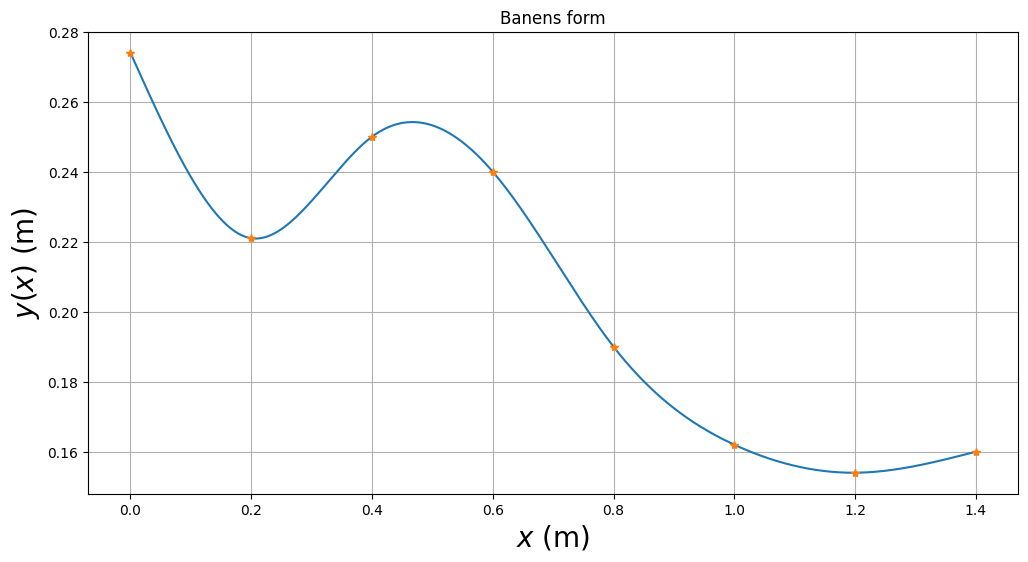

In [22]:
#Denne delen av koden er hentet fra CubicSpline notebooken som vi fikk utlevert.
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

h = 0.200
xfast = np.asarray([0, h, 2*h, 3*h, 4*h, 5*h, 6*h, 7*h])

xmin = 0.000
xmax = 1.401
dx = 0.001

yfast = np.asarray([0.274, 0.221, 0.25, 0.24, 0.19, 0.162, 0.154, 0.16])
inttan = np.diff(yfast)/h

cs = CubicSpline(xfast, yfast, bc_type='natural')
xmin = 0.000
xmax = 1.401
dx = 0.001

x = np.arange(xmin, xmax, dx)

Nx = len(x)
y = cs(x)  # y=tabell med 1401 verdier for y(x)
dy = cs(x, 1)  # dy=tabell med 1401 verdier for y'(x)
d2y = cs(x, 2)  # d2y=tabell med 1401 verdier for y''(x)

baneform = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, y, xfast, yfast, '*')
plt.title('Banens form')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.grid()
plt.show()

*Figur 1* - Graf av banens høyde som funksjon av horisontal posisjon.

## Metode ##
Grafen (*Figur 1*) over viser forsøksoppstillingen vår. En kule med masse 0.031kg og radius 0.011m rulles ned på banen vi konstruerte. Banen ble først generert ved å velge 8 tilfeldige y-verdier også beregnet ved hjelp av kubisk spline interpolasjon.
Forsøket ble filmet med mobilkamera og analysert ved hjelp av dataprogrammet «Tracker». Tracker anvender en kvadratisk regresjonstilpasning på de målte datapunktene fra videoen og gir ut et estimat for fart, posisjon og tid. For å få mest mulig nøyaktig svar måtte programmet kalibreres ved hjelp av en meterstokk.
Forsøket ble gjentatt 10 ganger og usikkerheten ble estimert ved å beregne en differanse mellom de ulike målte verdiene.
Den analytiske modellen og grafen vi bruker for å analysere dataene baserer seg på en antagelse og rulling uten forstyrrelser.


## Resultater ##
Banestart og -slutt ble målt til henholdsvis høydene $ (0.275 ± 0.005) m$ og $ (0.16 ± 0.005) m $ (se Figur 1), der usikkerheten er anslag basert på avlesningsnøyaktigheten.


| Y verdi med usikkerhet |
|----------------|
|0.275  ± 0.005m  |
|0.221 ± 0.005m   |
|0.250 ± 0.005m   |
|0.240 ± 0.005m   |
|0.190 ± 0.005m   |
|0.162 ± 0.005m   |
|0.154 ± 0.005m   |           
|0.160 ± 0.005m   |

*Tabell 1*


Det ble tatt 10 målinger av kulens slutthastighet i banen. Gjennomsnittet av disse verdiene og standardfeilen gir en gjennomsnittlig slutthastighet på $ (1.1496 \pm 0.0115) m/s $ som gir gjennomsnittlig kinetisk energi $(0.287 \pm 9.65*10^{-8}) J. $

Et tilfeldig valgt datasett (måling #6) er vist i *Figur* 2 sammen med den numeriske løsningen av farten til kulen nedover banen. Det oppsto noen avvik fra farten i den analytiske modellen og numeriske modellen, noe som var forventet. Ut i fra dette kan vi også regne ut den analytiske og numeriske kinetiske energien, se *Figur* 3. Ettersom den kinetiske energien er avhengig av farten, ser vi en forventet grad av ulikhet mellom disse grafene som med farten.

In [23]:
#Her leser vi inn målt data

g = 9.81
# treghetsmomentet
c = 2/5
M = 0.031
R = 0.011
I = c*M*R**2

file = 'lab_data.txt'
f = open(file, 'r')
data_list = f.readlines()
time_data, x_data, y_data, v_data, ek_data = [],[],[],[],[]

for i in range(2,len(data_list)):
    data_list[i] = data_list[i].replace(',','.')
    data = data_list[i].strip('\n').split('\t')
    time_data.append(float(data[0]))
    x_data.append(float(data[1]))
    y_data.append(float(data[2]))
    v_data.append(float(data[3]))
    omega = float(data[3])/R
    e_kinetic = (1/2)*M*(float(data[3])**2)
    e_rotation = (1/2)*I*(omega**2)
    ek_data.append(e_kinetic+e_rotation)

In [24]:
# fart
def v():
    return np.sqrt((2*g*(y[0]-y)/(1+c)))

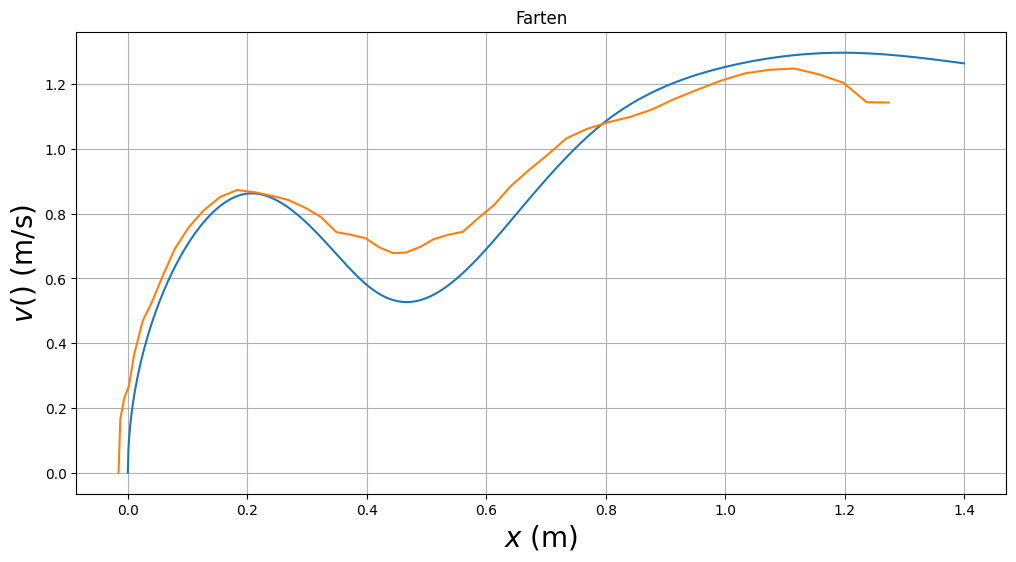

In [25]:
fart = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, v())
plt.plot(x_data,v_data)
plt.title('Farten')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v()$ (m/s)', fontsize=20)
plt.grid()
plt.show()

*Figur 2* - Graf over målt og simulert fart til kulen

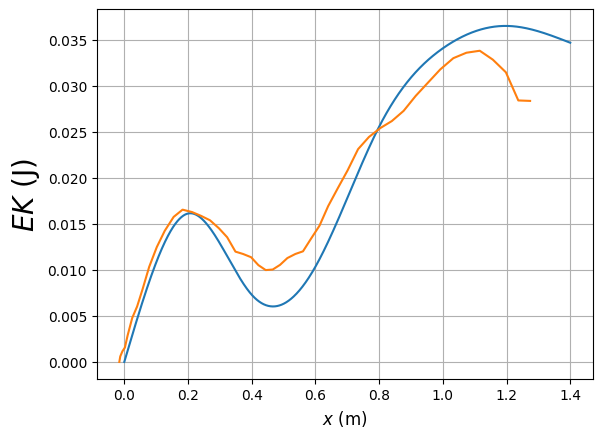

In [26]:
def kinetic_energy():
    return 1/2 * M * v()**2 + 1/2 * I * (v()/R)**2

plt.plot(x, kinetic_energy())
plt.plot(x_data, ek_data)
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$EK$ (J)', fontsize=20)
plt.grid()
plt.show()

*Figur 3* - Graf over målt og simulert kinetisk energi 

## Diskusjon ##
Vi måler farten til kulen på banen basert på dens *x*- og *y*-posisjon. Disse avstandene er målt med en sikkerhet som er begrenset av nøyaktigheten i avlesningen av meterstokken. Denne feilen har vi antatt vil ligge ved størrelsesorden $ \pm 0.05cm. $ 
Det er også andre feilkilder som kan ha spilt inn. Dette er spesielt perspektivfeil. Et eksempel på dette var avstanden mellom banen og kameraet som ble målt til 1.2 m. Dette kan gi perspektivfeil dersom dybden eller avstanden var målt feil. For eksempel, dersom avstanden hadde vært 1.25m ville vi fått perspektivfeil på $ (1.0m/1.2m) * 1.25m -1.0m ≈ 0.04m $ i posisjonsmålingene til Tracker. Dette kan forklare avviket vi får på målingene av farten. 

Til slutt er det noen mulige feilkilder knyttet til forenklinger i den teoretiske modellen som beskriver systemet og eksperimentet vårt. Blant annet neglisjerer vi luftmotstand og friksjon, og antar en rett, direkte bane for kulen. Det er rimelig å anta at ballen ruller uten å gli da kulen er laget av et materiale som er glatt og har en relativt liten radius. I realiteten av eksperimentet vil faktorene som friksjon og luftmotstand spille inn. Vi observerte blant annet at ballen ikke alltid rullet rett ned på banen, men kunne dunke mot “veggene” i sporet. Dette førte i så fall til mer friksjon og overføring av energi i dunkene, noe som kan gi en lavere fart på avlesningen. 

## Konklusjon ##
Vi målte fart og kinetisk energi av en kule som rullet ned en bane både med numerisk og analytisk løsning. Bakgrunnen for dette er å sammenligne hvor godt vi kna simulere virkeligheten og newtoniske teorier. Resultatet viste noe ulike verdier for de to mulige løsningene. Vi ser at gjenomsnittlig slutthastighet $ (1.150 \pm 0.0115)m/s $ og en gjennomsnittlig kinetisk energi $ (0.287 \pm 9.65*10^{-8}) J. $ for virkeligheten, men i simulasjonen fikk vi gjennomsnittlig slutthastighet $1.263m/s $ og gjennomsnittlig kinetiskenergi er gitt til $ 0.0347J. $ Grunner til disse avvikene kan skyldes menneskelige avlesningsfeil, perspektivfeil og neglisjering av luftmotstand, friksjon og andre usikkerheter i en rullende kule.

## Referanser ##
Støvneng, J. A. (2021, Januar 31). *Ren rulling på krumt underlag – energibevarelse.* Hentet fra TFY41xx Fysikk: Labprosjekt Vår 2021: https://home.phys.ntnu.no/brukdef/undervisning/fyslab/files/labligninger.pdf
